In [1]:
%matplotlib inline
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
import sys
import time


WARNING UserWarning: Using default configuration from /home/simonste/.venv/3ml/local/lib/python2.7/site-packages/threeML-0.4.946-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/simonste/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [3]:
result = load_analysis_results('../MNHSESsynthetic.fits')

In [4]:
pa = '/home/simonste/research/xrb/data/'
data_path = pa + 'input%s.txt'%'g'
gdata = XYLike.from_text_file("gdata", data_path)
gdata.assign_to_source(source_name = 'Xrb_gband_source')

data_path = pa +'input%s.txt'%'r'
rdata = XYLike.from_text_file("rdata", data_path)
rdata.assign_to_source(source_name = 'Xrb_rband_source')

data_path = pa +'input%s.txt'%'i'
idata = XYLike.from_text_file("idata", data_path)
idata.assign_to_source(source_name = 'Xrb_iband_source')

data_path = pa +'input%s.txt'%'z'
zdata = XYLike.from_text_file("zdata", data_path)
zdata.assign_to_source(source_name = 'Xrb_zband_source')

data_path = pa +'input%s.txt'%'J'
Jdata = XYLike.from_text_file("Jdata", data_path)
Jdata.assign_to_source(source_name = 'Xrb_Jband_source')

data_path = pa +'input%s.txt'%'H'
Hdata = XYLike.from_text_file("Hdata", data_path)
Hdata.assign_to_source(source_name = 'Xrb_Hband_source')

data_path = pa +'input%s.txt'%'K'
Kdata = XYLike.from_text_file("Kdata", data_path)
Kdata.assign_to_source(source_name = 'Xrb_Kband_source')

data = DataList(gdata,rdata,idata,zdata,Jdata,Hdata,Kdata)


Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.



WARNING FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



In [5]:
def ModeltoPointSource(band):
    mod = TemplateModel('Xrb_HSES_%s'%band,log_interp = False)
    mod.K.fix = True
    mod.scale.fix =True
    
    return PointSource('Xrb_%s_source'%band, 0, 0, spectral_shape = mod)

#modtest = TemplateModel('Xrb_HSES_gband',log_interp = False)
#modnewtest = modtest= + 0.2
##print modtest,modnewtest

filter_list = ['gband','rband','iband','zband','Jband','Hband','Kband']
point_source_list = ['ps_g','ps_r','ps_i','ps_z','ps_J','ps_H','ps_K']
PointSdict = {}
for h in range(len(filter_list)):
    PointSdict[point_source_list[h]] = ModeltoPointSource(filter_list[h])

my_model = Model(PointSdict['ps_g'],PointSdict['ps_r']
                 ,PointSdict['ps_i'],PointSdict['ps_z']
                 ,PointSdict['ps_J'],PointSdict['ps_H'],PointSdict['ps_K'])


In [48]:
def ModeltoPointSource(band):
    mod = TemplateModel('Xrb_HSES_%s'%band,log_interp = False)
    mod.K.fix = True
    mod.scale.fix =True
    
    return PointSource('Xrb_%s_source'%band, 0, 0, spectral_shape = mod)

filter_list = ['gband','rband','iband','zband','Jband','Kband']
point_source_list = ['ps_g','ps_r','ps_i','ps_z','ps_J','ps_K']
PointSdict = {}
for h in range(len(filter_list)):
    PointSdict[point_source_list[h]] = ModeltoPointSource(filter_list[h])

my_model = Model(PointSdict['ps_g'],PointSdict['ps_r']
                 ,PointSdict['ps_i'],PointSdict['ps_z']
                 ,PointSdict['ps_J'],PointSdict['ps_K'])


allInklParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Inkl,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Inkl,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Inkl,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Inkl,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Inkl]
allDtempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dtemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dtemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Dtemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Dtemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Dtemp]
allHSTempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSTemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSTemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSTemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSTemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSTemp]
allHSwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSWidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSWidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSWidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSWidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSWidth]
allHSAwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSAwidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSAwidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSAwidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSAwidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSAwidth]
allT_secParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.T_sec,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.T_sec,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.T_sec,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.T_sec,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.T_sec]
alldistfacParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.distfac,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.distfac,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.distfac,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.distfac,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.distfac]
allDsizeParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dsize,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dsize,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Dsize,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Dsize,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Dsize]

my_model.link(allInklParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl)
my_model.link(allDtempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dtemp)
my_model.link(allHSTempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSTemp)
my_model.link(allHSwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSWidth)
my_model.link(allHSAwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSAwidth)
my_model.link(allT_secParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec)
my_model.link(alldistfacParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.distfac)
my_model.link(allDsizeParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dsize)


my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl.prior = Uniform_prior(lower_bound = 60., upper_bound=78.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dtemp.prior = Truncated_gaussian(mu = 1373., sigma =31. ,lower_bound = 1000., upper_bound=2400.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSTemp.prior = Uniform_prior(lower_bound = 3000., upper_bound=9000.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSWidth.prior = Uniform_prior(lower_bound = 5., upper_bound=45.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSAwidth.prior = Uniform_prior(lower_bound = 0.001, upper_bound=0.009)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec = 4079
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec.fix = True
#my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec.prior = Truncated_gaussian(mu = 4079., sigma= 40. ,lower_bound = 4000., upper_bound=4400.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.distfac.prior = Uniform_prior(lower_bound = -1., upper_bound=1.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dsize.prior = Uniform_prior(lower_bound = 0.725, upper_bound=0.99)

my_model.display()

Model summary:
==============

                  N
Point sources     6
Extended sources  0
Particle sources  0

Free parameters (7):
--------------------

                             value min_value max_value unit
Xrb_gband_source...Inkl         69        60        78     
Xrb_gband_source...Dtemp      1700      1000      2400     
Xrb_gband_source...HSTemp     6000      3000      9000     
Xrb_gband_source...HSWidth      25         5        45     
Xrb_gband_source...HSAwidth  0.005     0.001     0.009     
Xrb_gband_source...distfac       0        -1         1     
Xrb_gband_source...Dsize       0.8     0.725      0.99     

Fixed parameters (41):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (40):
----------------------

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Inkl
current value                                               69.0
function                                                    Line
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....
unit                                                            

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dtemp
current value                                             1700.0 
function                                                    Line 
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband.... 
unit                                                             

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSTemp
current value                                             6000.0  
function                                                    Line  
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....  
unit                                                              

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSWidth
current value                                               25.0   
function                                                    Line   
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....   
unit                                                               

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSAwidth
current value                                              0.005    
function                                                    Line    
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....    
unit                                                                

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.T_sec
current value                                             4079.0 
function                                                    Line 
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband.... 
unit                                                             

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.distfac
current value                                                0.0   
function                                                    Line   
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....   
unit                                                               

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dsize
current value                                                0.8 
function                                                    Line 
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband.... 
unit                                                             

              Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Inkl
current value                                               69.0
function                                                    Line
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....
unit                                                            

              Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dtemp
current value                                             1700.0 
function                                                    Line 
linked to      Xrb_gband_s

In [6]:
allInklParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Inkl,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Inkl,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Inkl,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Inkl,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.Inkl,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Inkl]
allDtempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dtemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dtemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Dtemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Dtemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.Dtemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Dtemp]
allHSTempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSTemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSTemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSTemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSTemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.HSTemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSTemp]
allHSwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSWidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSWidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSWidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSWidth,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.HSWidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSWidth]
allHSAwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSAwidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSAwidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSAwidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSAwidth,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.HSAwidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSAwidth]
allT_secParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.T_sec,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.T_sec,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.T_sec,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.T_sec,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.T_sec,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.T_sec]
alldistfacParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.distfac,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.distfac,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.distfac,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.distfac,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.distfac,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.distfac]
allDsizeParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dsize,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dsize,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Dsize,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Dsize,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.Dsize,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Dsize]
my_model.link(allInklParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl)
my_model.link(allDtempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dtemp)
my_model.link(allHSTempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSTemp)
my_model.link(allHSwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSWidth)
my_model.link(allHSAwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSAwidth)
my_model.link(allT_secParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec)
my_model.link(alldistfacParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.distfac)
my_model.link(allDsizeParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dsize)

my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl.prior = Uniform_prior(lower_bound = 60, upper_bound=78)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dtemp.prior = Uniform_prior(lower_bound = 1000, upper_bound=2400)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSTemp.prior = Uniform_prior(lower_bound = 3000, upper_bound=9000)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSWidth.prior = Uniform_prior(lower_bound = 5, upper_bound=45)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSAwidth.prior = Uniform_prior(lower_bound = 0.001, upper_bound=0.009)
#my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec = 4079
#my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec.fix = True
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.distfac.prior = Uniform_prior(lower_bound = -1., upper_bound=1.)
my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dsize.prior = Uniform_prior(lower_bound = 0.725, upper_bound=0.99)

In [7]:
my_model.display(complete=True)


WARNING FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



Model summary:
==============

                  N
Point sources     7
Extended sources  0
Particle sources  0

Free parameters (8):
--------------------

                             value min_value max_value unit
Xrb_gband_source...Inkl         69        60        78     
Xrb_gband_source...Dtemp      1700      1000      2400     
Xrb_gband_source...HSTemp     6000      3000      9000     
Xrb_gband_source...HSWidth      25         5        45     
Xrb_gband_source...HSAwidth  0.005     0.001     0.009     
Xrb_gband_source...T_sec      4200      4000      4400     
Xrb_gband_source...distfac       0        -1         1     
Xrb_gband_source...Dsize       0.8     0.725      0.99     

Fixed parameters (44):
---------------------

                              value min_value max_value            unit
Xrb_gband_source.position.ra      0         0       360             deg
Xrb_gband_source.position.dec     0       -90        90             deg
Xrb_gband_source...K              1      None      None  keV-1 s-1 cm-2
Xrb_gband_source...scale          1      None      None           keV-1
Xrb_rband_source.position.ra      0         0       360             deg
Xrb_rband_source.position.dec     0       -90        90             deg
Xrb_rband_source...K              1      None      None  keV-1 s-1 cm-2
Xrb_rband_source...scale          1      None      None           keV-1
Xrb_Kband_source...a              1      None      None                
Xrb_Kband_source...b              0      None      None                
Xrb_iband_source.position.ra      0         0       360             deg
Xrb_iband_source.position.dec     0       -90        90             deg
Xrb_iband_source...K              1      None      None  keV-1 s-1 cm-2
Xrb_iband_source...scale          1      None      None           keV-1
Xrb_zband_source.position.ra      0         0       360             deg
Xrb_zband_source.position.dec     0       -90        90             deg
Xrb_zband_source...K              1      None      None  keV-1 s-1 cm-2
Xrb_zband_source...scale          1      None      None           keV-1
Xrb_Jband_source.position.ra      0         0       360             deg
Xrb_Jband_source.position.dec     0       -90        90             deg
Xrb_Jband_source...K              1      None      None  keV-1 s-1 cm-2
Xrb_Jband_source...scale          1      None      None           keV-1
Xrb_Hband_source.position.ra      0         0       360             deg
Xrb_Hband_source.position.dec     0       -90        90             deg
Xrb_Hband_source...K              1      None      None  keV-1 s-1 cm-2
Xrb_Hband_source...scale          1      None      None           keV-1
Xrb_Kband_source.position.ra      0         0       360             deg
Xrb_Kband_source.position.dec     0       -90        90             deg
Xrb_Kband_source...K              1      None      None  keV-1 s-1 cm-2
Xrb_Kband_source...scale          1      None      None           keV-1

Linked parameters (48):
----------------------

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Inkl
current value                                               69.0
function                                                    Line
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....
unit                                                            

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dtemp
current value                                             1700.0 
function                                                    Line 
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband.... 
unit                                                             

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSTemp
current value                                             6000.0  
function                                                    Line  
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....  
unit                                                

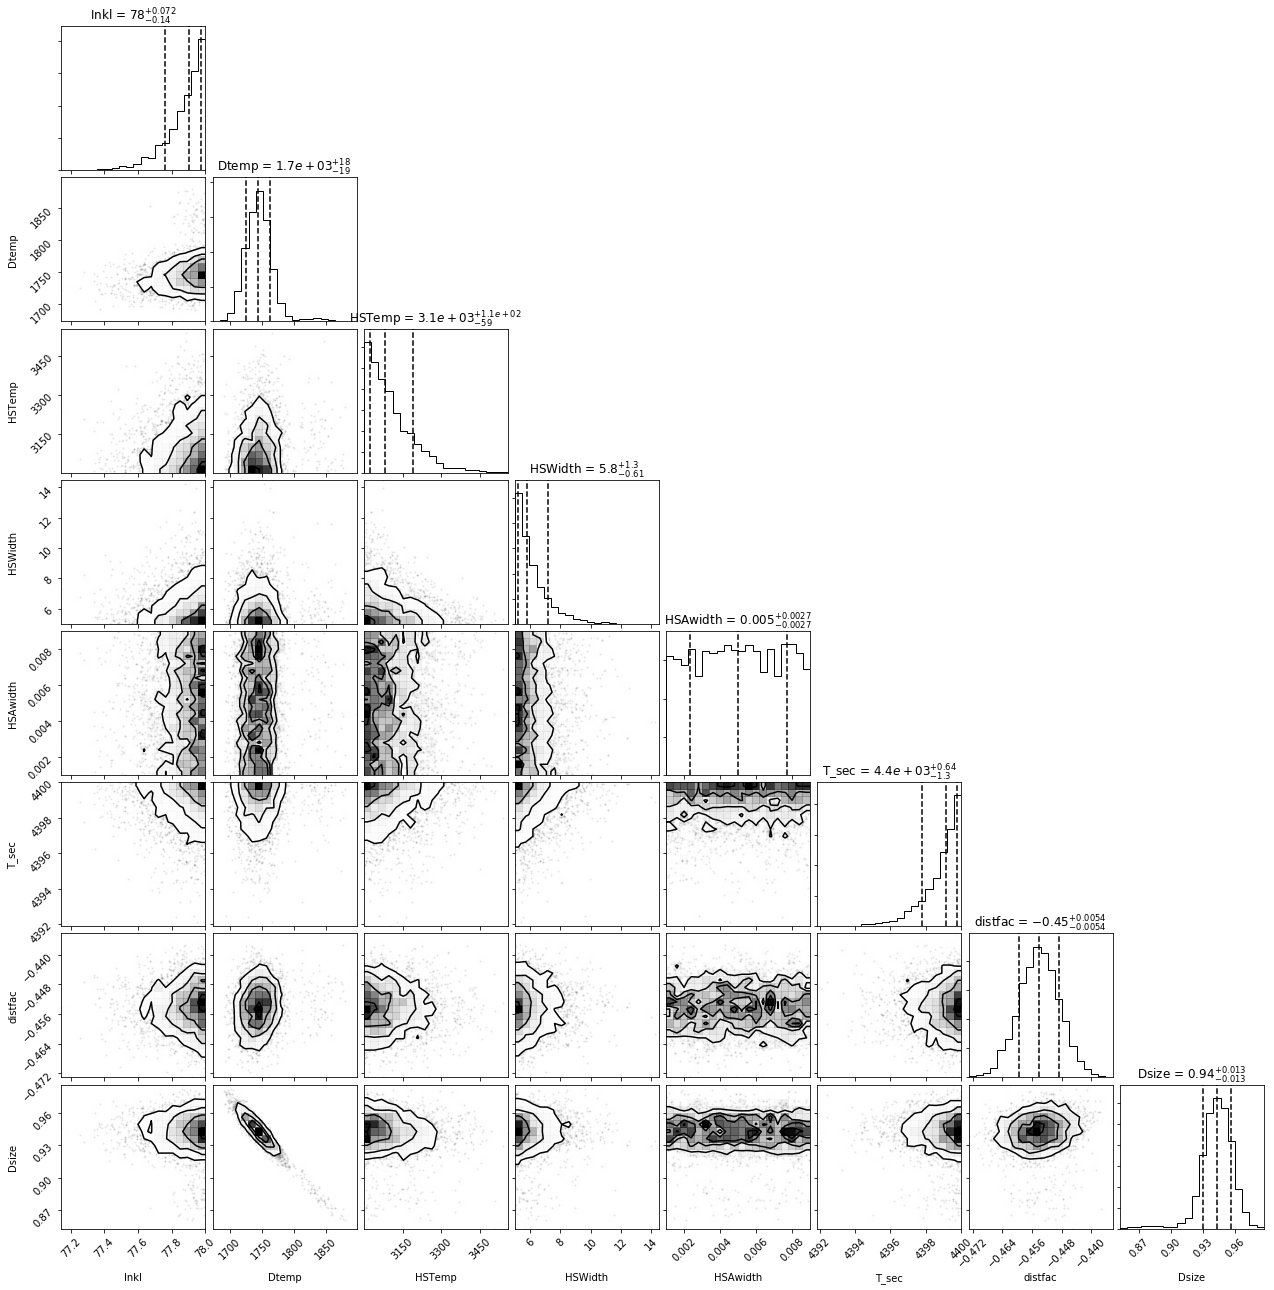

In [8]:
result.corner_plot();

In [41]:
result.display()

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl,(7.380 +/- 0.05) x 10,
Xrb_gband_source...Dtemp,(1.495 +/- 0.004) x 10^3,
Xrb_gband_source...HSTemp,(3.550 +/- 0.15) x 10^3,
Xrb_gband_source...HSWidth,6.9 -1.1 +1.0,
Xrb_gband_source...HSAwidth,(2.8 -1.3 +1.5) x 10^-3,
Xrb_gband_source...distfac,(-4.690 +/- 0.07) x 10^-1,
Xrb_gband_source...Dsize,(9.889 +/- 0.007) x 10^-1,



Values of -log(posterior) at the minimum:



,-log(posterior)
Hdata,-133.379813
Jdata,-212.099030
Kdata,-32.977802
gdata,-21477.156315
idata,-2257.784233
rdata,-3668.451433
total,-37374.567737
zdata,-9592.719113



Values of statistical measures:



,statistical measures
AIC,74763.666280
BIC,74786.858976
DIC,74696.255133
PDIC,2.730319
log(Z),-16231.148398


In [50]:
result.display()

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl,(7.462 -0.007 +0.04) x 10,
Xrb_gband_source...Dtemp,(1.4897 -0.0015 +0.0024) x 10^3,
Xrb_gband_source...HSTemp,(3.357 -0.032 +0.035) x 10^3,
Xrb_gband_source...HSWidth,(1.030 +/- 0.04) x 10,
Xrb_gband_source...HSAwidth,(3.45 -0.6 +0.32) x 10^-3,
Xrb_gband_source...distfac,(-4.947 -0.05 +0.004) x 10^-1,
Xrb_gband_source...Dsize,(9.8913 -0.0017 +0.007) x 10^-1,



Values of -log(posterior) at the minimum:



,-log(posterior)
Jdata,-289.958033
Kdata,-40.076956
gdata,-21456.690475
idata,-2249.471510
rdata,-3629.670303
total,-37261.806566
zdata,-9595.939289



Values of statistical measures:



,statistical measures
AIC,74538.249495
BIC,74560.117682
DIC,74481.786356
PDIC,2.028413
log(Z),-16188.443567


In [55]:
print result.samples.T[::500]

[[ 7.34160151e+01  1.47735527e+03  3.50960834e+03  8.34784708e+00
   1.89140117e-03 -4.88040698e-01  9.85536073e-01]
 [ 7.46981287e+01  1.48932733e+03  3.34588632e+03  1.02671549e+01
   3.43151526e-03 -4.95231193e-01  9.89726321e-01]]


In [35]:
for co,(source_name, point_source) in enumerate(my_model.point_sources.iteritems()):
    print source_name

Xrb_gband_source
Xrb_rband_source
Xrb_iband_source
Xrb_zband_source
Xrb_Jband_source
Xrb_Hband_source
Xrb_Kband_source


In [26]:
def  compplot2(params,ax,i):
    
    bands_data = [gdata,rdata,idata,zdata,Jdata,Hdata,Kdata]
    #bands_data = [zdata]
    lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
    #my_model.Xrb_gsource.spectrum.main.Xrb_template_gband.Mass.value = params[0]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl.value = params[0]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dtemp.value  =params[1]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSTemp.value =params[2]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSWidth.value = params[3]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSAwidth.value  = params[4]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec.value = params[5]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.distfac.value  =params[6]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dsize.value  =params[7]
    
    
    
    
    
    #modlist = [modelg,modelr,modeli,modelz,modelJ,modelH,modelK]
    for co,(source_name, point_source) in enumerate(my_model.point_sources.iteritems()):
        #if source_name == 'Xrb_Hband_source':
        #    continue
        #else:
        ax.plot(phases,point_source.spectrum.main.shape(phases),
                '-',c = lColor[co],alpha=0.1,lw=.5)#,label= "%s" %(point_source))
        
                
        
        

    co = 0
    if i == 0:
        for band in bands_data:
            ax.errorbar(band.x,band.y,yerr = band.yerr, fmt ='.', label = band.get_name()[0],c = lColor[co])
            co+=1

505.443979025


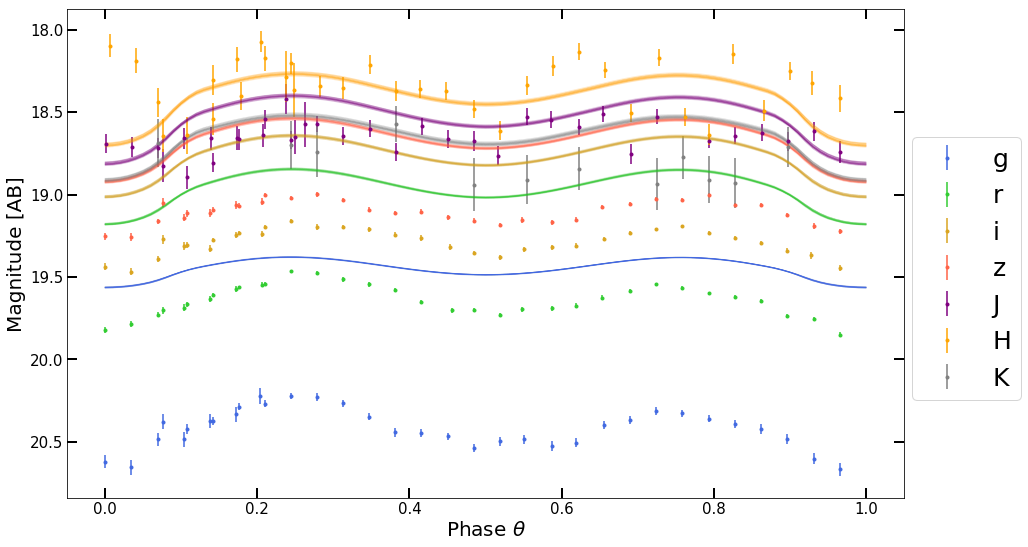

In [35]:
#evlist = range(0,20000,1000)
timestart = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(result.samples.T[::50]): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
ax.legend(fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
timestop = time.time()
print (timestop-timestart)

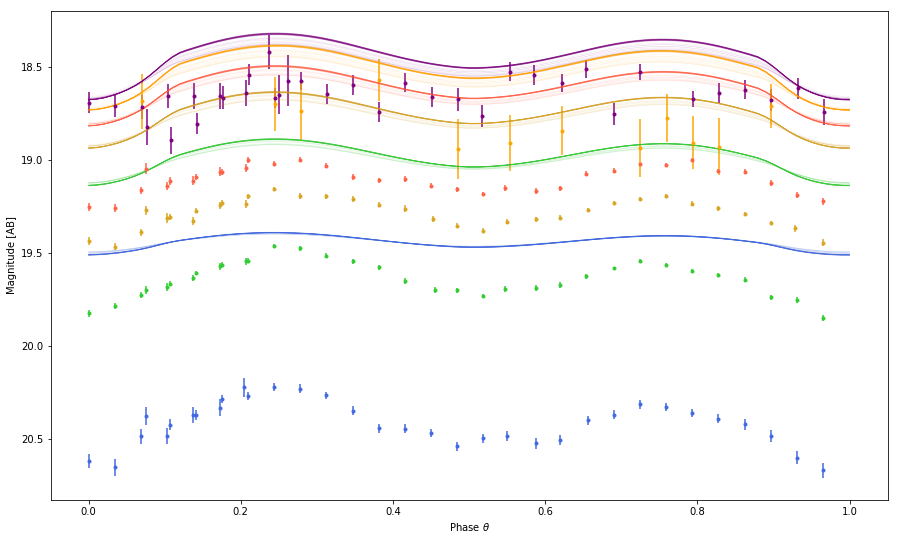

In [49]:
#evlist = range(0,20000,1000)
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(result.samples.T[::10]): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$")
#ax.legend()
ax.set_ylabel("Magnitude [AB]")
plt.gca().invert_yaxis()

In [21]:
def loguniform(low=0, high=1, size=None):
    return np.exp(np.random.uniform(low, high, size))

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([2.13475291, 2.23475291, 2.33475291, 2.43475291, 2.53475291,
        2.63475291, 2.73475291, 2.83475291, 2.93475291, 3.03475291,
        3.13475291]),
 <a list of 10 Patch objects>)

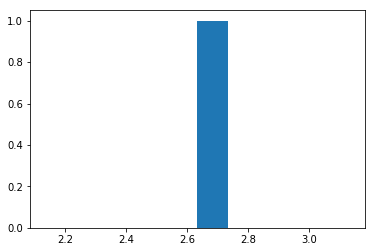

In [23]:
plt.hist(loguniform(),bins=10)

In [24]:
loguniform(0,1,10)

array([1.0454821 , 1.89539957, 2.3123922 , 1.93308474, 2.13497697,
       1.39958712, 2.10991611, 1.4340985 , 1.23299295, 1.57802017])

In [28]:
1e-20

1e-20

In [59]:
Truncated_gaussian.info()

In [80]:
t = Truncated_gaussian(mu = 4079., sigma= 40. ,lower_bound = 4000., upper_bound=4400.)

In [83]:
t(4079)

array(0.01022021)

In [78]:
x = -1

In [2]:
tg = Truncated_gaussian()

In [102]:
tg

* description: A  truncated Gaussian function defined on the interval between the lower_bound
    * (a) and upper_bound (b)
  * formula: $\begin{split}f(x;\mu,\sigma,a,b)=\frac{\frac{1}{\sigma} \phi\left( \frac{x-\mu}{\sigma}
    * \right)}{\Phi\left( \frac{b-\mu}{\sigma} \right) - \Phi\left( \frac{a-\mu}{\sigma}
    * \right)}\\\phi\left(z\right)=\frac{1}{\sqrt{2 \pi}}\exp\left(-\frac{1}{2}z^2\right)\\\Phi\left(z\right)=\frac{1}{2}\left(1+erf\left(\frac{z}{\sqrt(2)}\right)\right)\end{split}$
  * parameters:
    * F:
      * value: 1.0
      * desc: Integral between -inf and +inf. Fix this to 1 to obtain a Normal distribution
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * mu:
      * value: 0.0
      * desc: Central value
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * sigma:
      * value: 1.0
      * desc: standard deviation
      * min_value: 1.0e-12
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * lower_bound:
      * value: -1.0
      * desc: lower bound of gaussian, setting to -np.inf results in half normal distribution
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * upper_bound:
      * value: 1.0
      * desc: upper bound of gaussian  setting to np.inf results in half normal distribution
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true

In [3]:
tg.upper_bound = 5.

In [4]:
tg.from_unit_cube(1.)

5.0

In [5]:
import inspect

In [6]:
inspect.getsource(Truncated_gaussian)

'class Truncated_gaussian(Function1D):\n    r"""\n    description :\n\n        A  truncated Gaussian function defined on the interval between the lower_bound (a) and upper_bound (b)\n\n    latex : $\\begin{split}f(x;\\mu,\\sigma,a,b)=\\frac{\\frac{1}{\\sigma} \\phi\\left( \\frac{x-\\mu}{\\sigma} \\right)}{\\Phi\\left( \\frac{b-\\mu}{\\sigma} \\right) - \\Phi\\left( \\frac{a-\\mu}{\\sigma} \\right)}\\\\\\phi\\left(z\\right)=\\frac{1}{\\sqrt{2 \\pi}}\\exp\\left(-\\frac{1}{2}z^2\\right)\\\\\\Phi\\left(z\\right)=\\frac{1}{2}\\left(1+erf\\left(\\frac{z}{\\sqrt(2)}\\right)\\right)\\end{split}$\n\n    parameters :\n\n        F :\n\n            desc : Integral between -inf and +inf. Fix this to 1 to obtain a Normal distribution\n            initial value : 1\n\n        mu :\n\n            desc : Central value\n            initial value : 0.0\n\n        sigma :\n\n            desc : standard deviation\n            initial value : 1.0\n            min : 1e-12\n\n        lower_bound :\n\n        